In [113]:
import os, os.path
import cv2
import random
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np


nuetral_path = "../Lab1/Cohn-Kanade/neutral/"
happy_path = "../Lab1/Cohn-Kanade/happy/"
surprise_path = "../Lab1/Cohn-Kanade/surprise/"
disgust_path = "../Lab1/Cohn-Kanade/disgust/"


neutral_imgs = []
happy_imgs = []
surprise_imgs = []
disgust_imgs = []

images = os.listdir(nuetral_path)
for img_num, img in enumerate(images):
    neutral_imgs.append(cv2.cvtColor(cv2.imread(nuetral_path + '/' + img), cv2.COLOR_BGR2GRAY))

images = os.listdir(happy_path)
for img_num, img in enumerate(images):
    happy_imgs.append(cv2.cvtColor(cv2.imread(happy_path + '/' + img), cv2.COLOR_BGR2GRAY))

images = os.listdir(surprise_path)
for img_num, img in enumerate(images):
    surprise_imgs.append(cv2.cvtColor(cv2.imread(surprise_path + '/' + img), cv2.COLOR_BGR2GRAY))

images = os.listdir(disgust_path)
for img_num, img in enumerate(images):
    disgust_imgs.append(cv2.cvtColor(cv2.imread(disgust_path + '/' + img), cv2.COLOR_BGR2GRAY))

random.shuffle(neutral_imgs)
random.shuffle(happy_imgs)
random.shuffle(surprise_imgs)
random.shuffle(disgust_imgs)


X = neutral_imgs + happy_imgs + surprise_imgs + disgust_imgs
y = [-2]*len(neutral_imgs) + [-1]*len(happy_imgs) + [1]*len(surprise_imgs) + [2]*len(disgust_imgs)

X_train = neutral_imgs[0:120] + happy_imgs[:60] + surprise_imgs[:60] + disgust_imgs[0:30]
X_test = neutral_imgs[120:] + happy_imgs[60:] + surprise_imgs[60:] + disgust_imgs[30:]
y_train = [-2]*120 + [-1]*60 + [1]*60 + [2]*30
y_test = [-2]*(len(neutral_imgs)-120) + [-1]*(len(happy_imgs)-60) + [1]*(len(surprise_imgs)-60) + [2]*(len(disgust_imgs)-30)


twoD_to_vec = lambda mat: mat.reshape(-1).T
X_train_vectorized = list(map(twoD_to_vec, X_train))
X_test_vectorized = list(map(twoD_to_vec, X_test))


pca = decomposition.PCA(n_components=50)

X_train_pca = pca.fit_transform(X_train_vectorized)
X_test_pca = pca.transform(X_test_vectorized)

در قسمت بالا صرفا داده ها را مطابق خواسته لود کرده و با پی سی ای کاهش بعد داده ایم.

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statistics import mean

pca_cv = decomposition.PCA(n_components=10)


X = neutral_imgs + happy_imgs + surprise_imgs + disgust_imgs
X = list(map(twoD_to_vec, X))
y = [-2]*len(neutral_imgs) + [-1]*len(happy_imgs) + [1]*len(surprise_imgs) + [2]*len(disgust_imgs)
n = len(y)

C_list = range(5, 30, 2)
accuracy_list = []
cv_scores = []

Num_Folds = 5

# for C in C_list:
#     svm = SVC(C=C) 
#     for i in range(Num_Folds):
#         X_train_cv = X[0 : int(i*n/Num_Folds)] + X[int((i+1)*n/Num_Folds) : ]
#         X_test_cv = X[int(i*n/Num_Folds) : int((i+1)*n/Num_Folds)] 
#         y_train_cv = y[0 : int(i*n/Num_Folds)] + y[int((i+1)*n/Num_Folds) : ]
#         y_test_cv = y[int(i*n/Num_Folds) : int((i+1)*n/Num_Folds)] 

#         X_train_pca_cv = pca.fit_transform(X_train)
#         X_test_pca_cv = pca.transform(X_test)

#         svm.fit(X_train_pca, y_train)
#         y_pred_cv = svm.predict(X_test_pca_cv)
#         accuracy_list.append(accuracy_score(y_test, y_pred_cv))

#     cv_scores.append(mean(accuracy_list))
#     accuracy_list.clear()

        
C_opt = C_list[cv_scores.index(max(cv_scores))]
print(F"Best C Value is {C_opt}")



Best C Value is 25


در سل بالا برای یک تعداد محتمل برای مقدار «سی» و با روش «کی فولد» با مقدار 5 مقدار بهینه «سی» را پیدا کرده ایم که برابر با 25 میباشد.
دقت کنید که زمان اجرای سل بالا طولانی است و درصورتی که اجرای آن لزومی ندارد آن را اجرا نکنید در غیر اینصورت با آنکامنت کردن کد های بالا به اجرای آن و بررسی خروجی بپردازید.

In [125]:
from sklearn.metrics import classification_report

SVM_classifier = SVC(C=C_opt)  
SVM_classifier.fit(X_train_pca, y_train)

y_pred = SVM_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8214285714285714
              precision    recall  f1-score   support

          -2       0.77      0.94      0.85        70
          -1       0.90      0.72      0.80        25
           1       1.00      0.86      0.92        28
           2       0.70      0.41      0.52        17

    accuracy                           0.82       140
   macro avg       0.84      0.73      0.77       140
weighted avg       0.83      0.82      0.81       140



در سل بالا مدل «اس وی ام» را برای مقدار «سی» بهینه بدست آمده در سل های قبل آموزش داده و دقت را بدست آورده ایم. همچنین با ابزاری که کتابخانه 
سایکیت لرن در اختیار ما قرار میدهد، معیار های دیگری را نیز برای عملکرد این مدل نشان داده ایم که در جدول بالا قابل مشاهده است.

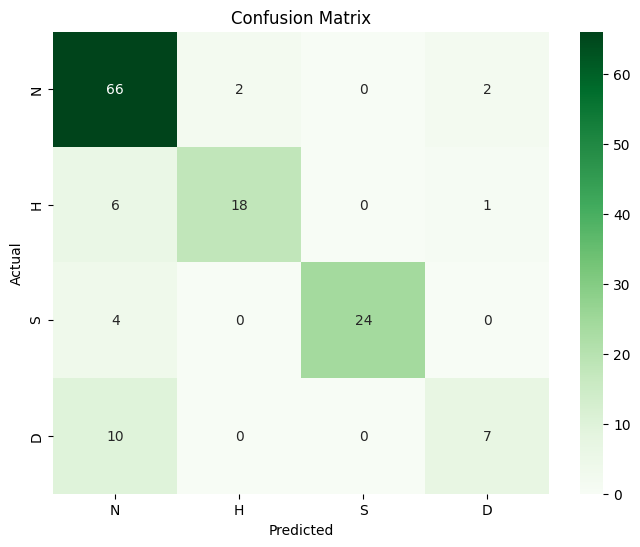

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels="NHSD", yticklabels="NHSD")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


در این قسمت نیز، یک حالت تصویرسازی شده برای فهم بهتر عملکرد مدل را نشان داده ایم. در ماتریس فوق، میتوانید عملکرد مدل برای پیش بینی لیبل هر داده و لیبل واقعی آن را مشاهده کنید.
با استفاده از این ماتریس داده های خوبی قابل فهم است مثلا اینکه مدل نسبت به کدام کلاس دقت کمتر یا بیشتری دارد.

Best C value: 15
